In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("happiness.csv", sep =';')

In [3]:
print(data.head())

  Country name  Year  Life Ladder Log GDP per capita Social support  \
0  Afghanistan  2008  3,723589897        7,168690205    0,450662315   
1  Afghanistan  2009  4,401778221        7,333789825     0,55230844   
2  Afghanistan  2010   4,75838089        7,386628628    0,539075196   
3  Afghanistan  2011   3,83171916        7,415018559    0,521103561   
4  Afghanistan  2012  3,782937527        7,517126083    0,520636737   

  Healthy life expectancy at birth Freedom to make life choices   Generosity  \
0                      50,79999924                  0,718114316  0,177888572   
1                      51,20000076                  0,678896368  0,200178429   
2                      51,59999847                   0,60012722   0,13435255   
3                      51,91999817                  0,495901406  0,172136664   
4                      52,24000168                  0,530935049  0,244272724   

  Perceptions of corruption Positive affect  ...  \
0                0,88168633     0,517637

# task 1: corelation with life ladder

In [4]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].str.replace(',', '.')

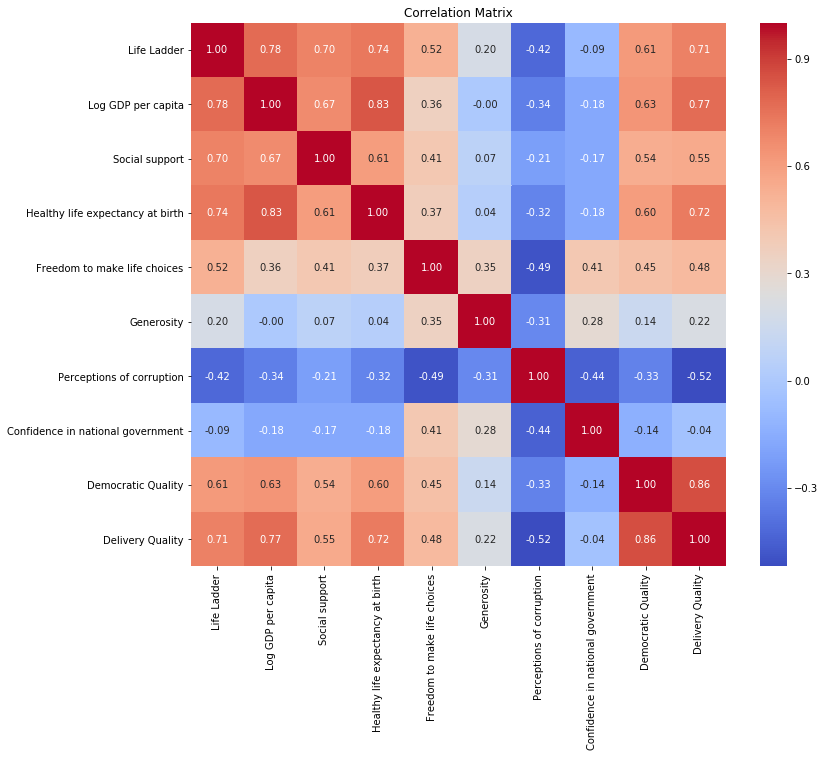

In [5]:
selected_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                'Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Confidence in national government',
                'Democratic Quality', 'Delivery Quality']

for column in selected_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
selected_data = data[selected_columns]
correlation_matrix = selected_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [6]:
for i in data.columns:
    print(i)

Country name
Year
Life Ladder
Log GDP per capita
Social support
Healthy life expectancy at birth
Freedom to make life choices
Generosity
Perceptions of corruption
Positive affect
Negative affect
Confidence in national government
Democratic Quality
Delivery Quality
Standard deviation of ladder by country-year
Standard deviation/Mean of ladder by country-year
GINI index (World Bank estimate)
GINI index (World Bank estimate), average 2000-16
gini of household income reported in Gallup, by wp5-year
Most people can be trusted, Gallup
Most people can be trusted, WVS round 1981-1984
Most people can be trusted, WVS round 1989-1993
Most people can be trusted, WVS round 1994-1998
Most people can be trusted, WVS round 1999-2004
Most people can be trusted, WVS round 2005-2009
Most people can be trusted, WVS round 2010-2014


In [7]:
print(len(data))

1704


# Total Countries 

In [8]:
print(len(data["Country name"].unique()))

165


In [9]:
print(data["Year"].min())
print(data["Year"].max())

2005
2018


# total score calculation

In [10]:
top_5 = data.groupby('Country name')['Life Ladder'].mean().nlargest(5)
print(top_5)

Country name
Denmark        7.692072
Finland        7.554010
Norway         7.549186
Switzerland    7.534953
Netherlands    7.466531
Name: Life Ladder, dtype: float64


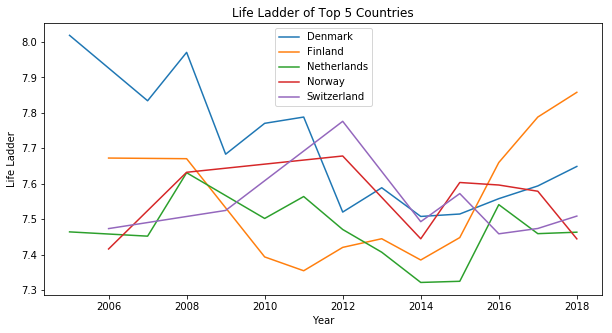

In [11]:
# Filter data for top 5 countries
top_5_data = data[data['Country name'].isin(top_5.index)]
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each country's life ladder over the years with labels
for country, country_data in top_5_data.groupby('Country name'):
    ax.plot(country_data['Year'], country_data['Life Ladder'], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
ax.set_title('Life Ladder of Top 5 Countries')
ax.legend()
plt.show()

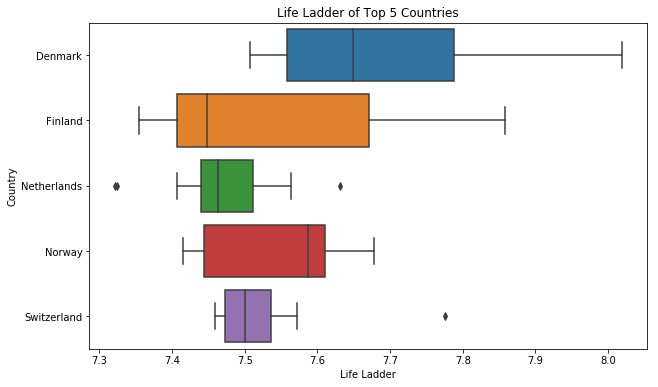

In [12]:
top_5_data = data[data['Country name'].isin(top_5.index)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Life Ladder', y='Country name', data=top_5_data)
plt.xlabel('Life Ladder')
plt.ylabel('Country')
plt.title('Life Ladder of Top 5 Countries')
plt.show()

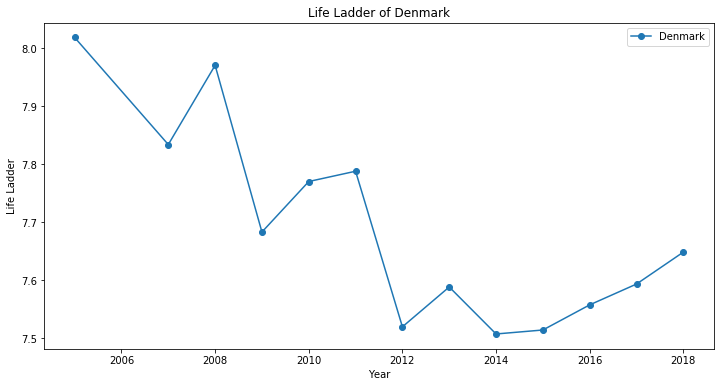

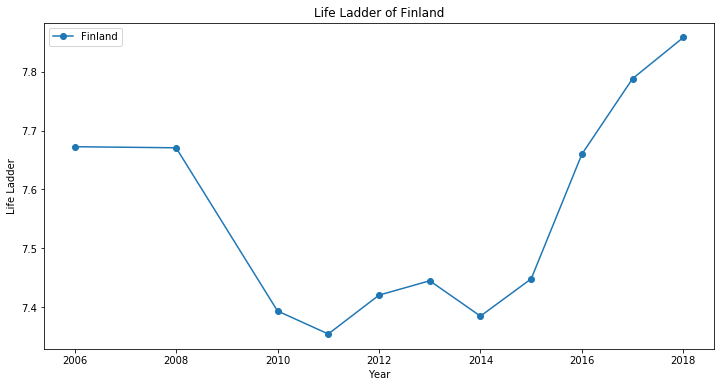

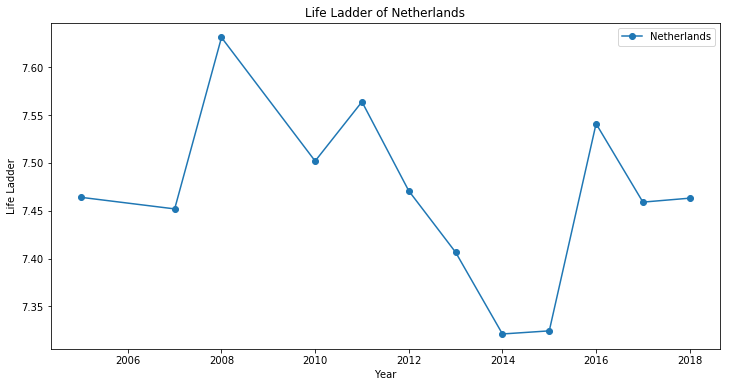

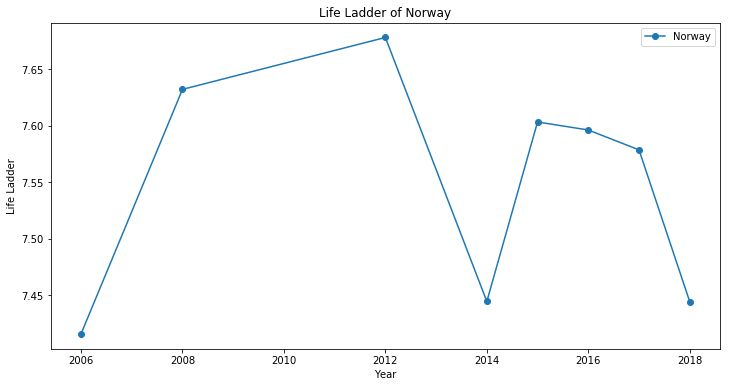

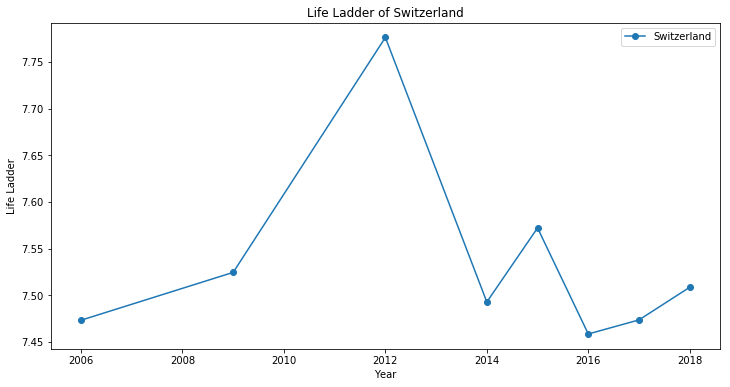

In [13]:
# Filter data for top 5 countries
top_5_data = data[data['Country name'].isin(top_5.index)]

for country, country_data in top_5_data.groupby('Country name'):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(country_data['Year'], country_data['Life Ladder'], marker='o', linestyle='-', label=country)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Ladder')
    ax.set_title(f'Life Ladder of {country}')
    ax.legend()
    plt.show()

In [14]:
bottom_5 = data.groupby('Country name')['Life Ladder'].mean().nsmallest(5)
print(bottom_5)

Country name
South Sudan                 3.401875
Togo                        3.477006
Central African Republic    3.514954
Burundi                     3.548124
Rwanda                      3.689593
Name: Life Ladder, dtype: float64


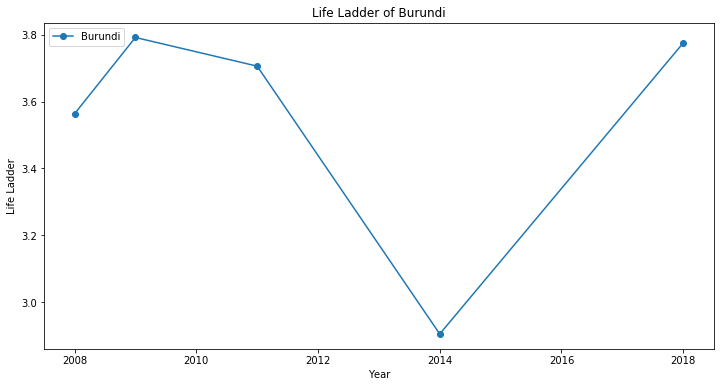

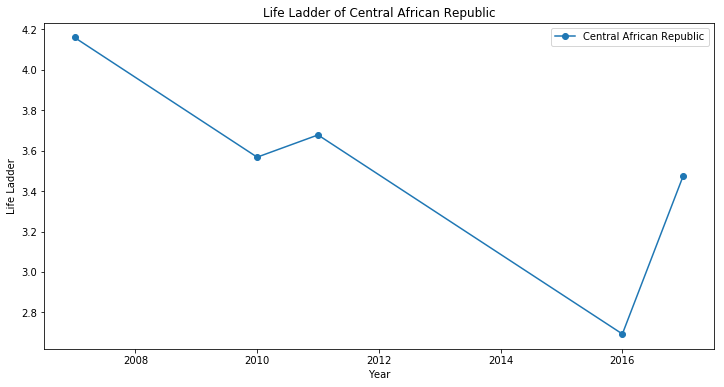

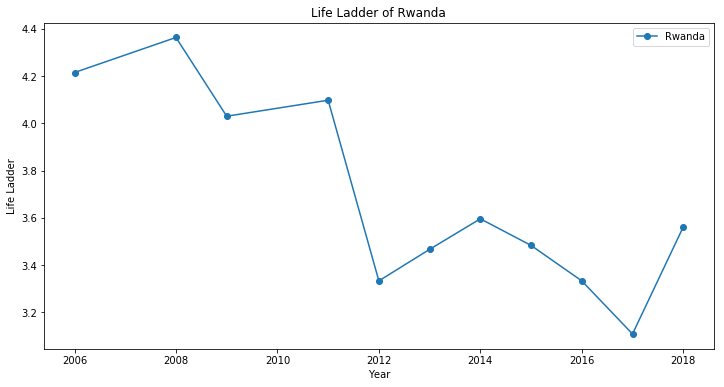

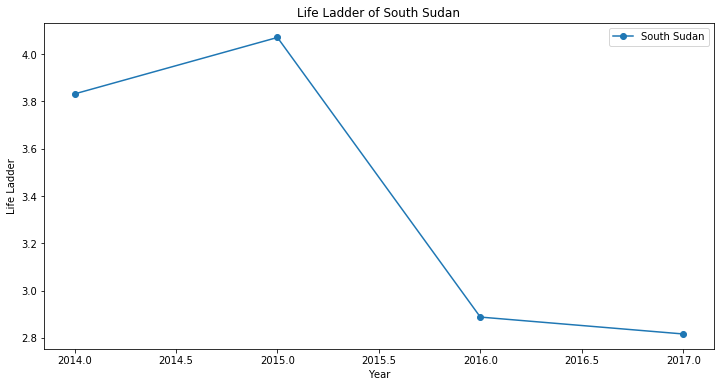

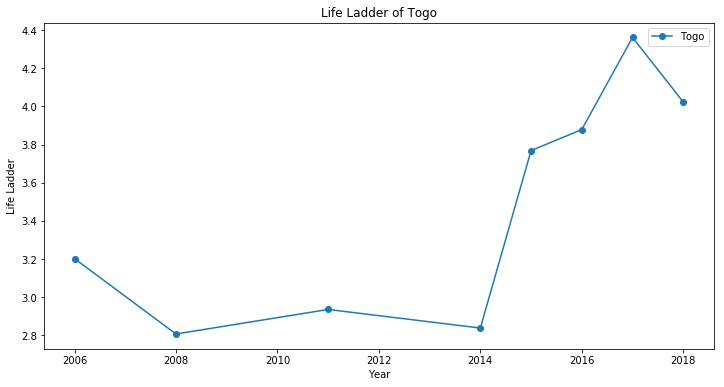

In [15]:
# Filter data for bottom 5 countries
bottom_5_data = data[data['Country name'].isin(bottom_5.index)]

for country, country_data in bottom_5_data.groupby('Country name'):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(country_data['Year'], country_data['Life Ladder'], marker='o', linestyle='-', label=country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Ladder')
    ax.set_title(f'Life Ladder of {country}')
    ax.legend()
    plt.show()

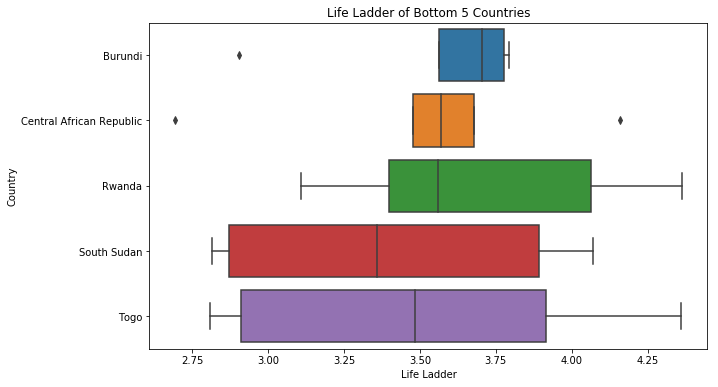

In [16]:
# Filter data for bottom 5 countries
bottom_5_data = data[data['Country name'].isin(bottom_5.index)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Life Ladder', y='Country name', data=bottom_5_data)
plt.xlabel('Life Ladder')
plt.ylabel('Country')
plt.title('Life Ladder of Bottom 5 Countries')
plt.show()

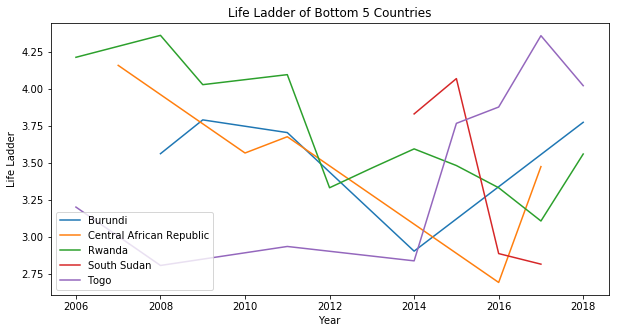

In [17]:
# Filter data for top 5 countries
bottom_5_data = data[data['Country name'].isin(bottom_5.index)]
fig, ax = plt.subplots(figsize=(10, 5))

for country, country_data in bottom_5_data.groupby('Country name'):
    ax.plot(country_data['Year'], country_data['Life Ladder'], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
ax.set_title('Life Ladder of Bottom 5 Countries')
ax.legend()
plt.show()

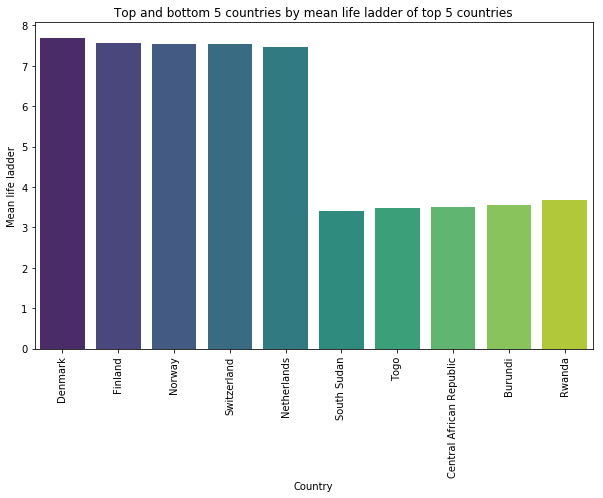

In [18]:
total_score = top_5.append(bottom_5)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_score.index, y=total_score.values, palette="viridis")
plt.xlabel('Country')
plt.ylabel('Mean life ladder')
plt.title('Top and bottom 5 countries by mean life ladder of top 5 countries')
plt.xticks(rotation=90)
plt.show()

# Nan Count

In [19]:
len(data.loc[data.isna().any(axis=1)]) # at least one column has nan

1701

In [20]:
nan_counts = data.isna().sum()
nan_pct = (nan_counts/len(data) * 100)
for col, nan_pct in nan_pct.items():
    print(f"{col}: {nan_pct:.2f}%")

Country name: 0.00%
Year: 0.00%
Life Ladder: 0.00%
Log GDP per capita: 1.64%
Social support: 0.76%
Healthy life expectancy at birth: 1.64%
Freedom to make life choices: 1.70%
Generosity: 4.81%
Perceptions of corruption: 5.63%
Positive affect: 1.12%
Negative affect: 0.76%
Confidence in national government: 10.21%
Democratic Quality: 8.57%
Delivery Quality: 8.51%
Standard deviation of ladder by country-year: 0.00%
Standard deviation/Mean of ladder by country-year: 0.00%
GINI index (World Bank estimate): 62.27%
GINI index (World Bank estimate), average 2000-16: 11.85%
gini of household income reported in Gallup, by wp5-year: 21.65%
Most people can be trusted, Gallup: 89.44%
Most people can be trusted, WVS round 1981-1984: 92.66%
Most people can be trusted, WVS round 1989-1993: 87.09%
Most people can be trusted, WVS round 1994-1998: 63.73%
Most people can be trusted, WVS round 1999-2004: 71.19%
Most people can be trusted, WVS round 2005-2009: 63.03%
Most people can be trusted, WVS round 20

# Gini Index

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


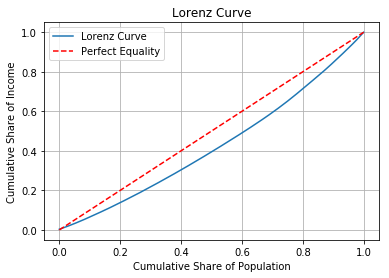

Gini Index: 0.15


In [21]:
last_year = max(data['Year'])
last_year_data = data[data['Year'] == last_year]

# Dropping rows with missing values in the income column
last_year_data.dropna(subset=["gini of household income reported in Gallup, by wp5-year"], inplace=True)

# Converting income column to numeric values
last_year_data["gini of household income reported in Gallup, by wp5-year"] = pd.to_numeric(last_year_data["gini of household income reported in Gallup, by wp5-year"], errors='coerce')
last_year_data.sort_values(by="gini of household income reported in Gallup, by wp5-year", inplace=True)
last_year_data.reset_index(drop=True, inplace=True)
last_year_data.index += 1

data_gini = last_year_data["gini of household income reported in Gallup, by wp5-year"].to_numpy()
data_gini = np.sort(data_gini)
total = np.sum(data_gini)
cumulative_income = np.cumsum(data_gini)
cumulative_percentage_income = cumulative_income / total

# Calculate Lorenz curve coordinates
x = np.linspace(0, 1, num=len(data_gini))
y = cumulative_percentage_income

# Calculate the area under the Lorenz curve (AUC)
area_under_curve = np.trapz(y, x)

# Calculate Gini index
gini_index = 1 - 2 * area_under_curve

# Plot the Lorenz curve
plt.plot(x, y, label='Lorenz Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Equality')
plt.xlabel('Cumulative Share of Population')
plt.ylabel('Cumulative Share of Income')
plt.title('Lorenz Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"Gini Index: {gini_index:.2f}")

# Additional aspect 1 (most corrupted 5 countries and less corrupted 5 countries)

In [22]:
top_5_corrupt = data.groupby('Country name')['Perceptions of corruption'].mean().nlargest(5)
print(top_5_corrupt)

Country name
Romania                   0.953108
Bulgaria                  0.945998
Bosnia and Herzegovina    0.945059
Moldova                   0.936990
Indonesia                 0.936821
Name: Perceptions of corruption, dtype: float64


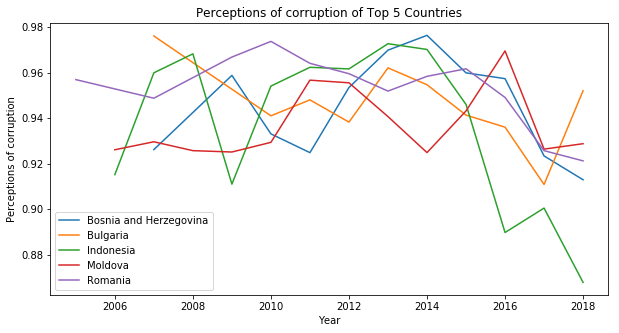

In [23]:
top_5_corrupt_data = data[data['Country name'].isin(top_5_corrupt.index)]

fig, ax = plt.subplots(figsize=(10, 5))

for country, country_data in top_5_corrupt_data.groupby('Country name'):
    ax.plot(country_data['Year'], country_data['Perceptions of corruption'], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Perceptions of corruption')
ax.set_title('Perceptions of corruption of Top 5 Countries')
ax.legend()
plt.show()

In [24]:
bottom_5_corrupt = data.groupby('Country name')['Perceptions of corruption'].mean().nsmallest(5)
print(bottom_5_corrupt)

Country name
Singapore    0.100310
Qatar        0.183798
Rwanda       0.187590
Denmark      0.201390
Finland      0.261558
Name: Perceptions of corruption, dtype: float64


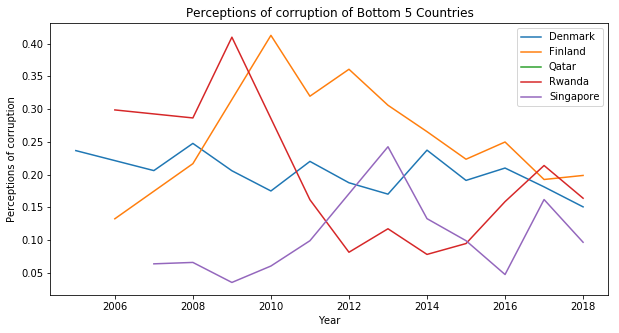

In [25]:
bottom_5_corrupt_data = data[data['Country name'].isin(bottom_5_corrupt.index)]

fig, ax = plt.subplots(figsize=(10, 5))

for country, country_data in bottom_5_corrupt_data.groupby('Country name'):
    ax.plot(country_data['Year'], country_data['Perceptions of corruption'], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Perceptions of corruption')
ax.set_title('Perceptions of corruption of Bottom 5 Countries')
ax.legend()
plt.show()

# task 4: comparison of Hong Kong, China, Germany

In [26]:
hong_kong_data = (data[data["Country name"] == "Hong Kong S.A.R. of China"])
china_data = (data[data["Country name"] == "China"])
germany_data = (data[data["Country name"] == "Germany"])
asian_food = pd.concat([hong_kong_data, china_data, germany_data])

In [27]:
life_ladder = asian_food.groupby('Country name')['Life Ladder'].sum()
log_gdp = asian_food.groupby('Country name')['Log GDP per capita'].sum()
life_choices = asian_food.groupby('Country name')['Freedom to make life choices'].sum()
social_support = asian_food.groupby('Country name')['Social support'].sum()

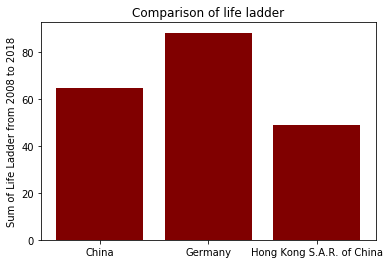

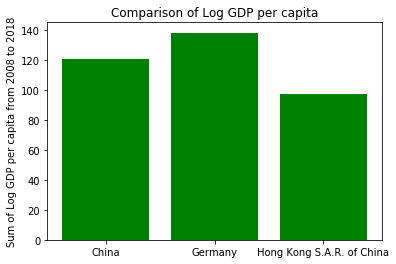

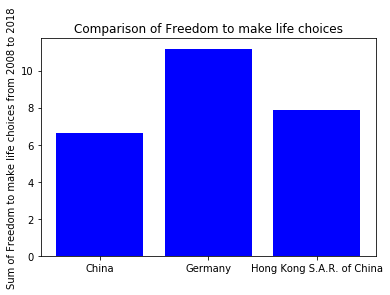

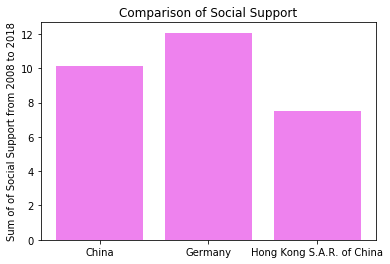

In [28]:
plt.bar(life_ladder.index, life_ladder[0:3], color="maroon")
plt.title("Comparison of life ladder")
plt.ylabel("Sum of Life Ladder from 2008 to 2018")
plt.show()
plt.bar(log_gdp.index, log_gdp[0:3], color="green")
plt.title("Comparison of Log GDP per capita")
plt.ylabel("Sum of Log GDP per capita from 2008 to 2018")
plt.show()
plt.bar(life_choices.index, life_choices[0:3], color="blue")
plt.title("Comparison of Freedom to make life choices")
plt.ylabel("Sum of Freedom to make life choices from 2008 to 2018")
plt.show()
plt.bar(social_support.index, social_support, color="violet")
plt.title("Comparison of Social Support")
plt.ylabel("Sum of of Social Support from 2008 to 2018")
plt.show()

# Additional aspect 2 (comparison between 2018 and 2008 based on healthy life expectancy at birth)

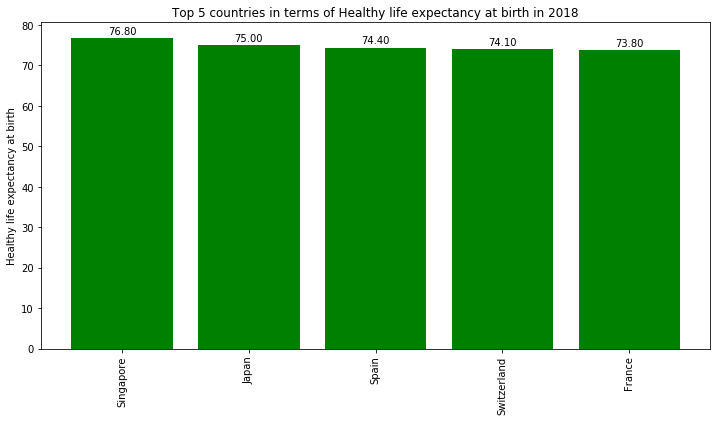

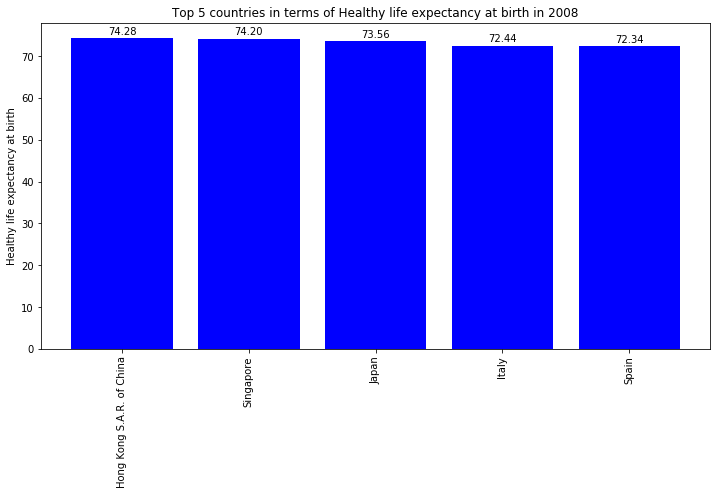

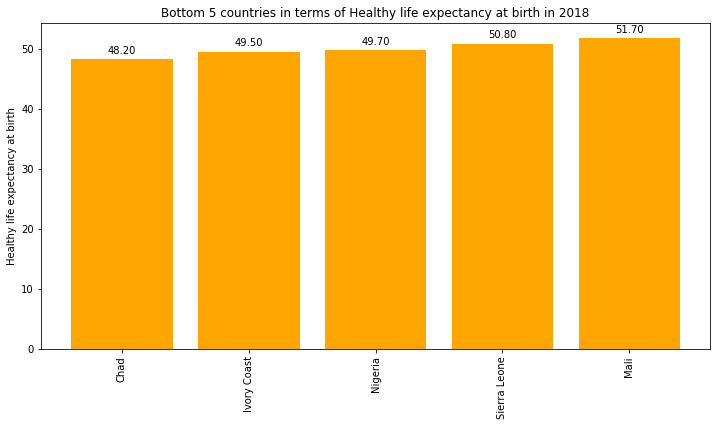

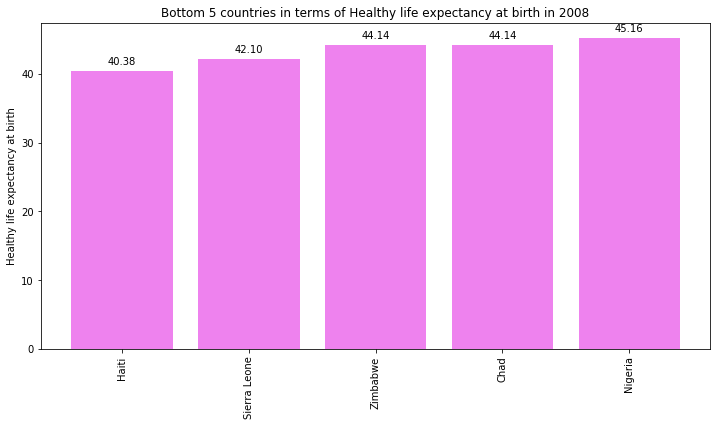

In [29]:
year_data_2018 = data[data['Year'] == 2018]
year_data_2008 = data[data['Year'] == 2008]
top_5_2018 = year_data_2018.sort_values(by='Healthy life expectancy at birth', ascending=False)
top_5_2018_sorted = top_5_2018.head()
top_5_2008 = year_data_2008.sort_values(by='Healthy life expectancy at birth', ascending=False)
top_5_2008_sorted = top_5_2008.head(5)
bottom_5_2018 = year_data_2018.sort_values(by='Healthy life expectancy at birth', ascending=True)
bottom_5_2018_sorted = bottom_5_2018.head(5)
bottom_5_2008 = year_data_2008.sort_values(by='Healthy life expectancy at birth', ascending=True)
bottom_5_2008_sorted = bottom_5_2008.head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_5_2018_sorted["Country name"], top_5_2018_sorted["Healthy life expectancy at birth"], color = "green")
for i, value in enumerate(top_5_2018_sorted["Healthy life expectancy at birth"]):
    plt.text(i, value + 1, f'{value:.2f}', ha='center')
plt.xticks(rotation=90)
plt.title("Top 5 countries in terms of Healthy life expectancy at birth in 2018")
plt.ylabel("Healthy life expectancy at birth")
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_5_2008_sorted["Country name"], top_5_2008_sorted["Healthy life expectancy at birth"], color = "blue")
for i, value in enumerate(top_5_2008_sorted["Healthy life expectancy at birth"]):
    plt.text(i, value + 1, f'{value:.2f}', ha='center')
plt.xticks(rotation=90)
plt.title("Top 5 countries in terms of Healthy life expectancy at birth in 2008")
plt.ylabel("Healthy life expectancy at birth")
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(bottom_5_2018_sorted["Country name"], bottom_5_2018_sorted["Healthy life expectancy at birth"], color = "orange")
for i, value in enumerate(bottom_5_2018_sorted["Healthy life expectancy at birth"]):
    plt.text(i, value + 1, f'{value:.2f}', ha='center')
plt.xticks(rotation=90)
plt.title("Bottom 5 countries in terms of Healthy life expectancy at birth in 2018")
plt.ylabel("Healthy life expectancy at birth")
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(bottom_5_2008_sorted["Country name"], bottom_5_2008_sorted["Healthy life expectancy at birth"], color = "violet")
for i, value in enumerate(bottom_5_2008_sorted["Healthy life expectancy at birth"]):
    plt.text(i, value + 1, f'{value:.2f}', ha='center')
plt.xticks(rotation=90)
plt.title("Bottom 5 countries in terms of Healthy life expectancy at birth in 2008")
plt.ylabel("Healthy life expectancy at birth")
plt.show()

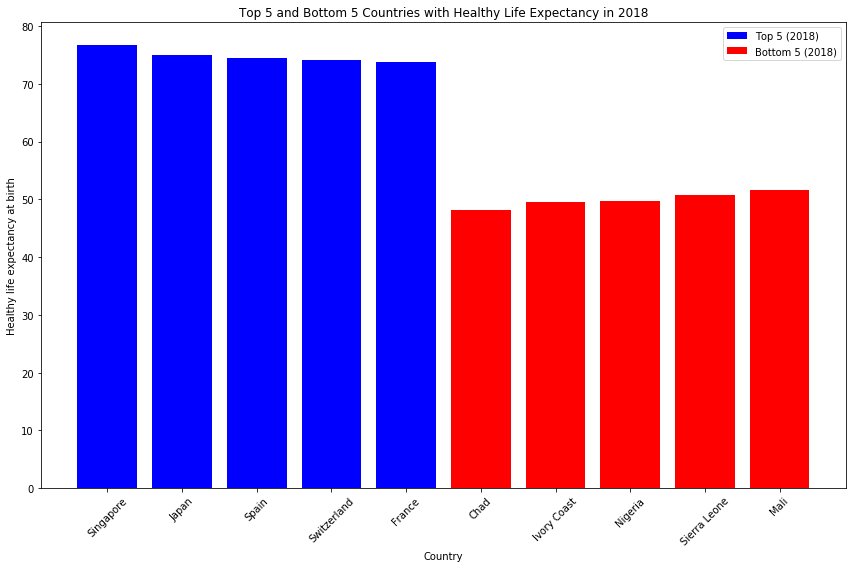

In [30]:
year_data_2018 = data[data['Year'] == 2018]
top_5_2018 = year_data_2018.sort_values(by='Healthy life expectancy at birth', ascending=False)
bottom_5_2018 = year_data_2018.sort_values(by='Healthy life expectancy at birth', ascending=True)
top_5_2018_sorted = top_5_2018.head(5)
bottom_5_2018_sorted = bottom_5_2018.head(5)

plt.figure(figsize=(12, 8))
plt.bar(top_5_2018_sorted['Country name'], top_5_2018_sorted['Healthy life expectancy at birth'], color='blue', label='Top 5 (2018)')
plt.bar(bottom_5_2018_sorted['Country name'], bottom_5_2018_sorted['Healthy life expectancy at birth'], color='red', label='Bottom 5 (2018)')
plt.xlabel('Country')
plt.ylabel('Healthy life expectancy at birth')
plt.title('Top 5 and Bottom 5 Countries with Healthy Life Expectancy in 2018')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

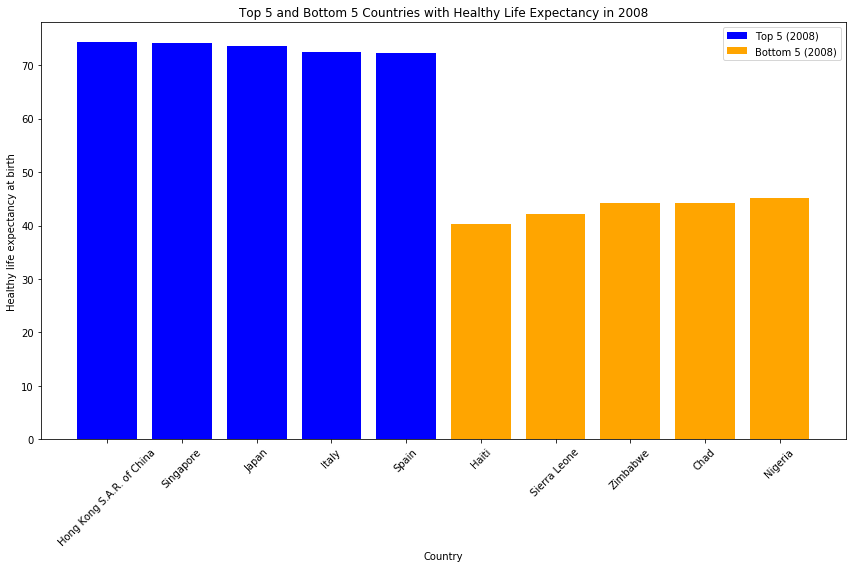

In [31]:
year_data_2008 = data[data['Year'] == 2008]
top_5_2008 = year_data_2008.sort_values(by='Healthy life expectancy at birth', ascending=False)
bottom_5_2008 = year_data_2008.sort_values(by='Healthy life expectancy at birth', ascending=True)
top_5_2008_sorted = top_5_2008.head(5)
bottom_5_2008_sorted = bottom_5_2008.head(5)

plt.figure(figsize=(12, 8))
plt.bar(top_5_2008_sorted['Country name'], top_5_2008_sorted['Healthy life expectancy at birth'], color='blue', label='Top 5 (2008)')
plt.bar(bottom_5_2008_sorted['Country name'], bottom_5_2008_sorted['Healthy life expectancy at birth'], color='orange', label='Bottom 5 (2008)')
plt.xlabel('Country')
plt.ylabel('Healthy life expectancy at birth')
plt.title('Top 5 and Bottom 5 Countries with Healthy Life Expectancy in 2008')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Additional Aspect 3

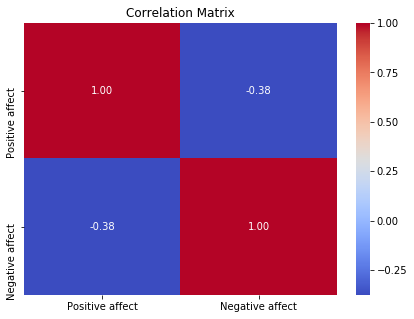

In [32]:
selected_columns = ['Positive affect', 'Negative affect']

for column in selected_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
selected_data = data[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(7, 5))  # Set the figure size to accommodate all columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


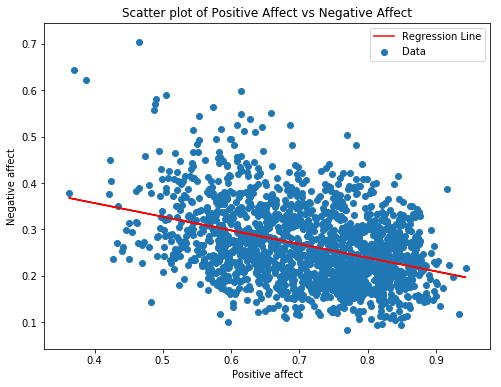

In [33]:
import statsmodels.api as sm

data_clean = data.dropna(subset=['Positive affect', 'Negative affect'])
data_clean = data_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['Positive affect', 'Negative affect'])

plt.figure(figsize=(8, 6))
plt.scatter(data_clean['Positive affect'], data_clean['Negative affect'], label='Data')
X = sm.add_constant(data_clean['Positive affect'])
model = sm.OLS(data_clean['Negative affect'], X)
results = model.fit()
slope = results.params['Positive affect']
intercept = results.params['const']
plt.plot(data_clean['Positive affect'], slope * data_clean['Positive affect'] + intercept, color='red', label='Regression Line')

plt.title('Scatter plot of Positive Affect vs Negative Affect')
plt.xlabel('Positive affect')
plt.ylabel('Negative affect')
plt.legend()

plt.savefig('Positive Negative affect Scatterplot.pdf')
plt.show()
